## Clustering viz

In [1]:
import pickle

with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie/movie_review_doc2vec_model.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)
    
with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie/navermovie_info_idx2moviename.pkl', 'rb') as f:
    id2movie = pickle.load(f)

Doc2Vec에서 document(영화)의 임베딩 차원은 100이며, 영화의 갯수는 172개임을 확인할 수 있음

In [2]:
doc2vec_model.docvecs.doctag_syn0.shape

(172, 100)

172개의 각 row에 해당하는 영화가 무엇인지 제목을 미리 list로 만들어둠. 각 row id에 해당하는 label이 dict형태로, Doc2Vec.docvecs.doctags에 저장되어 있음

id가 72523의 row id는 offset=0번임. docvecs.doctags로부터 아래의 코드를 실행하면 row별 영화 이름을 얻을 수 있음

작업의 각 부분들의 내용을 확인하기 위해 step별로 list의 3개의 값을 출력함

dict.items()를 하면 (key, value)의 list가 만들어짐. 이를 offset 기준으로 정렬하려면 sorted의 key가 offset을 지정해주면 됨

In [3]:
row2movie = sorted(doc2vec_model.docvecs.doctags.items(), key=lambda x:x[1].offset)

from pprint import pprint
pprint(row2movie[:4])

[('MOVIE_72523', Doctag(offset=0, word_count=95807, doc_count=10187)),
 ('MOVIE_59845', Doctag(offset=1, word_count=145728, doc_count=13095)),
 ('MOVIE_109753', Doctag(offset=2, word_count=203777, doc_count=10361)),
 ('MOVIE_45321', Doctag(offset=3, word_count=296181, doc_count=26915))]


row[0]에 의해 key들의 list가 만들어지고 str인 key를 \_로 split한 뒤 [1]을 가져왔으므로 영화 id가 str형식으로 만들어짐

In [4]:
row2movie = [row[0].split('_')[1] for row in row2movie]
print(row2movie[:3])

['72523', '59845', '109753']


idx2movie를 이용하여 str형식의 영화 id를 영화 이름으로 변경

In [5]:
row2movie = [id2movie.get(row, None) for row in row2movie]
print(row2movie[:3])

['고사 두 번째 이야기: 교생실습', '박쥐', '해무']


## K-means
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

    KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
    
spherical k-means를 구현하기 위해선 metrics='cosine'으로 변경. k-means는 Euclidean을 기준으로 만들어짐. 만약 spherical k-means를 설정하고자 한다면, (172, 100)의 행렬을 row normalize하여 unit vector로 만들어야 함

In [6]:
from sklearn.preprocessing import normalize

# 모형의 value값을 지닌 행렬을 그대로 사용함
movie_vectors = normalize(doc2vec_model.docvecs.doctag_syn0, axis=1, norm='l2')

kmeans는 .fit_predict()와 .fit_transform() 두 가지 함수가 존재

    kmeans.fit_predict(doc2vec_model.docvecs.doctag_syn0)
    
fit_predict는 각 row의 label을 하나로 출력

    kmeans.fit_transform(doc2vec_model.docvecs.doctag_syn0)
    
fit_transform은 각 row 별로 k 개의 centroid와의 거리를 출력 

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, max_iter=10, n_init=1, verbose=1)
print('kmeans.fit_predict()')
clusters = kmeans.fit_predict(movie_vectors)

print('\n\nkmeans.fit_transform()')
distance = kmeans.fit_transform(movie_vectors)

kmeans.fit_predict()
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 63.8952
start iteration
done sorting
end inner loop
Iteration 1, inertia 61.2315
start iteration
done sorting
end inner loop
Iteration 2, inertia 59.9298
start iteration
done sorting
end inner loop
Iteration 3, inertia 59.4295
start iteration
done sorting
end inner loop
Iteration 4, inertia 59.2587
start iteration
done sorting
end inner loop
Iteration 5, inertia 59.2079
start iteration
done sorting
end inner loop
Iteration 6, inertia 59.2079
center shift 0.000000e+00 within tolerance 6.219525e-07


kmeans.fit_transform()
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 64.3562
start iteration
done sorting
end inner loop
Iteration 1, inertia 60.5869
start iteration
done sorting
end inner loop
Iteration 2, inertia 59.2172
start iteration
done sorting
end inner loop
Iteration 3, inertia 58.0581
start iteration
done sorting
end inner loop
Ite

In [8]:
clusters

array([4, 2, 9, 8, 1, 2, 5, 0, 1, 4, 8, 5, 3, 5, 3, 5, 9, 3, 1, 3, 4, 2, 7,
       0, 6, 7, 0, 9, 1, 6, 3, 1, 1, 7, 2, 7, 2, 6, 2, 8, 9, 9, 0, 7, 3, 0,
       2, 3, 1, 6, 3, 8, 3, 5, 7, 3, 5, 2, 3, 4, 8, 0, 2, 1, 9, 1, 3, 6, 4,
       6, 1, 5, 6, 6, 9, 1, 8, 3, 3, 3, 2, 7, 3, 8, 7, 1, 4, 9, 1, 4, 1, 2,
       7, 1, 3, 5, 3, 6, 3, 2, 3, 6, 3, 9, 2, 1, 2, 3, 6, 1, 0, 7, 8, 4, 1,
       3, 5, 4, 6, 4, 4, 1, 1, 3, 6, 3, 6, 3, 7, 0, 8, 1, 1, 2, 3, 5, 3, 2,
       1, 6, 6, 4, 5, 9, 6, 6, 4, 1, 2, 8, 5, 3, 6, 7, 9, 3, 8, 2, 1, 0, 1,
       1, 3, 4, 3, 3, 3, 6, 3, 7, 3, 1], dtype=int32)

In [9]:
distance.shape

(172, 10)

In [10]:
distance

array([[ 1.00776696,  1.15984023,  1.11450279, ...,  0.77788609,
         0.99433744,  0.79507792],
       [ 1.06772983,  1.11007488,  1.15411174, ...,  0.63797492,
         0.90492499,  0.89402008],
       [ 0.91416931,  1.14640009,  1.18865705, ...,  1.00015831,
         1.21329784,  1.20927846],
       ..., 
       [ 0.78110337,  1.06664968,  1.2224524 , ...,  1.02023673,
         1.15254533,  1.26334012],
       [ 0.91870588,  0.67714381,  0.73855913, ...,  1.20366633,
         1.0032655 ,  1.08491528],
       [ 0.98810357,  0.83676296,  0.8756507 , ...,  0.8640601 ,
         0.62956959,  0.68509537]], dtype=float32)

같은 cluster label을 지니는 영화별로 그룹을 묶어서 이름을 확인. 그 뒤, 각 label 별로 몇 개의 영화로 묶여 있는지 갯수를 출력함

In [11]:
from collections import defaultdict

cluster_to_row = defaultdict(lambda: [])
for row_id, label in enumerate(clusters):
    cluster_to_row[label].append(row_id)
    
cluster_to_row = dict(cluster_to_row)
for label, rows in cluster_to_row.items():
    print('cluster # %d has %d movies'%(label, len(rows)))

cluster # 4 has 14 movies
cluster # 2 has 18 movies
cluster # 9 has 11 movies
cluster # 8 has 11 movies
cluster # 1 has 28 movies
cluster # 5 has 12 movies
cluster # 0 has 9 movies
cluster # 3 has 36 movies
cluster # 7 has 13 movies
cluster # 6 has 20 movies


각 cluster별로 10개씩 영화의 이름을 출력하여, 군집화 결과가 어떤 느낌인지 확인해보자.

In [12]:
for label, rows in cluster_to_row.items():
    print('\ncluster # %d'%label)
    for row in rows[:10]:
        print('  > %s'%row2movie[row])


cluster # 4
  > 고사 두 번째 이야기: 교생실습
  > 미스터 고
  > 과속스캔들
  > 박수건달
  > 세 얼간이
  > 초능력자
  > 퀵
  > 투사부일체
  > 시라노; 연애조작단
  > 전우치

cluster # 2
  > 박쥐
  > 국가대표
  > 미녀는 괴로워
  > 지금, 만나러 갑니다
  > 포화 속으로
  > 의형제
  > 광해, 왕이 된 남자
  > 해바라기
  > 고지전
  > 왕의 남자

cluster # 9
  > 해무
  > 내가 살인범이다
  > 곡성(哭聲)
  > 검은 사제들
  > 악마를 보았다
  > 감시자들
  > 더 테러 라이브
  > 끝까지 간다
  > 숨바꼭질
  > 추격자

cluster # 8
  > 해운대
  > 7광구
  > 판도라
  > 카트
  > 감기
  > 도가니
  > 연가시
  > 부산행
  > 타워
  > 소원

cluster # 1
  > 인터스텔라
  > 해리 포터와 죽음의 성물 - 2부
  > 다크 나이트
  > 겨울왕국
  > 인셉션
  > 타이타닉
  > 캐리비안의 해적 - 세상의 끝에서
  > 클레멘타인
  > 스카이라인
  > 트와일라잇

cluster # 5
  > 도둑들
  > 럭키
  > 해적: 바다로 간 산적
  > 아가씨
  > 검사외전
  > 관상
  > 역린
  > 신의 한 수
  > 아수라
  > 베테랑

cluster # 0
  > 베를린
  > 영웅: 샐러멘더의 비밀
  > 신세계
  > 좋은 놈, 나쁜 놈, 이상한 놈
  > 용의자
  > 최종병기 활
  > 아저씨
  > 테이큰
  > 세븐 데이즈

cluster # 3
  > 다크 나이트 라이즈
  > 배트맨 대 슈퍼맨: 저스티스의 시작
  > 메이즈 러너: 스코치 트라이얼
  > 캡틴 아메리카: 시빌 워
  > 빅 히어로
  > 인디펜던스 데이: 리써전스
  > 제이슨 본
  > 트랜스포머 3
  > 배틀쉽
  > 쥬라기 월드

cluster # 7
  > 터널
  > 대호
  > 26년
  > 

kmeans의 KMeans.clustercenters는 각 centroid의 좌표임

Doc2Vec 임베딩 벡터의 크기가 100이고, 클러스터의 갯수가 10이 때문에 centers 행렬의 크기는 (10, 100)임

### T-SNE를 이용한 시각화
label로 각 군집의 id와 영화 2개의 이름을 함께 annotation

영화의 갯수가 172개 뿐이고, 300차원이기 때문에 10개의 군집으로 묶었을 때, 군집의 centroids의 벡터값이 서로 비슷할 수 있음. 이는 시각화의 측면에서는 좋지 않은 영향을 줄 수 있음. 시각화는 비슷한 것의 거리는 작게, 비슷하지 않은 것의 거리는 크게 표현되어야 함. 하지만 k-means의 centroids는 고차원 벡터들의 평균임. order 이상의 의미가 없을 수 있음

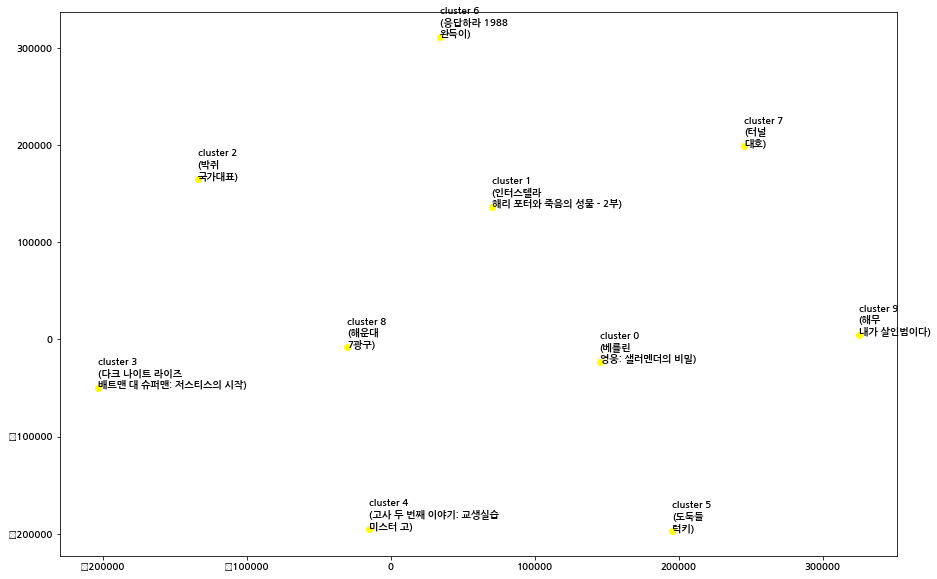

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
krfont = {'family': 'nanumgothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)

from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2)
y_tsne = tsne.fit_transform(kmeans.cluster_centers_)
y_tsne = y_tsne*1000

plt.figure(figsize=(15, 10))
plt.scatter(y_tsne[:, 0], y_tsne[:, 1], color = 'yellow')
for i in range(y_tsne.shape[0]):
    one_sample = row2movie[cluster_to_row[i][0]]
    two_sample = row2movie[cluster_to_row[i][1]]
    plt.annotate('cluster %d \n(%s\n%s)'%(i, one_sample, two_sample), (y_tsne[i, 0], y_tsne[i, 1]))

plt.show()

## clustering keywords

각 군집의 키워드들을 추출해봄

doc2vec, k-means를 학습할 것인지, 학습된 k-means로부터 같은 군집에 해당하는 영화들의 리뷰를 하나로 합쳐둔 corpus와 term frequency matrix를 만들 것인지를 정하는 파라미터를 설정함

In [14]:
TRAIN_DOC2VEC = True
TRAIN_KMEANS = True
CREATE_MERGED_CORPUS = True
CREATE_MERGED_CORPUS_TERMFREQUENCY_MATRIX = True
TRAIN_LOGISTIC_FULL = True
TRAIN_LOGISTIC_MIN_1000 = True

tokenized_corpus_fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/merged_comments_tokenized.txt'
doc2vec_fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/movie_review_doc2vec_model.pkl'
logistic_l1_full = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/logistic_l1_full.pkl'
logistic_l1_min1000 = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/logistic_l1_min1000.pkl'

TRAIN_DOC2VEC=True이면, gensim으로부터 Doc2Vec을 import하여 학습을 진행
TRAIN_DOC2VEC=False이면 이전에 학습된 모델을 loading함

In [15]:
if TRAIN_DOC2VEC:
    import pickle
    from gensim.models import Doc2Vec
    from gensim.models.doc2vec import TaggedDocument
    
    class CommentDoc2Vec:
        def __init__(self, fname):
            self.fname = fname
        def __iter__(self):
            with open(self.fname, encoding='utf-8') as f:
                for doc in f:
                    movie_idx, text, score = doc.split('\t')
                    yield TaggedDocument(words=text.split(), tags=['MOVIE_%s'%movie_idx])
                    
    doc2vec_corpus = CommentDoc2Vec(tokenized_corpus_fname)
    doc2vec_model = Doc2Vec(doc2vec_corpus)
    with open(doc2vec_fname, 'wb') as f:
        pickle.dump(doc2vec_model, f)
        
else:
    import pickle
    with open(doc2vec_fname, 'rb') as f:
        doc2vec_model = pickle.load(f)

{영화 id: 영화 이름}의 dictionary를 pickle로부터 읽어옴

In [17]:
import pickle
with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie/navermovie_info_idx2moviename.pkl', 'rb') as f:
    id2movie = pickle.load(f)

Doc2Vec 모델에 저장되어 있는 docvec의 document vector를 l2로 row normalization을 수행함. 그 뒤, KMeans.fit_predict()를 이용해 군집화를 수행함으로써 Spherical k-means처럼 군집화를 수행함

In [18]:
%%time

if TRAIN_KMEANS:
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import normalize
    
    movie_vectors = normalize(doc2vec_model.docvecs.doctag_syn0, axis = 1, norm='l2')
    kmeans = KMeans(n_clusters=100, max_iter=20, n_init=1, verbose=1)
    clusters = kmeans.fit_predict(movie_vectors)
    
    with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/kmeans_100.pkl', 'wb') as f:
        pickle.dump(kmeans, f)
        
    with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/kmeans_100_label', 'wb') as f:
        pickle.dump(clusters, f)
        
else:
    with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/kmeans_100.pkl', 'rb') as f:
        kmeans = pickle.load(f)
        
    with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/kmeans_100_label', 'rb') as f:
        clusters = pickle.load(f)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1493.61
start iteration
done sorting
end inner loop
Iteration 1, inertia 1428.75
start iteration
done sorting
end inner loop
Iteration 2, inertia 1412.24
start iteration
done sorting
end inner loop
Iteration 3, inertia 1403.54
start iteration
done sorting
end inner loop
Iteration 4, inertia 1398.21
start iteration
done sorting
end inner loop
Iteration 5, inertia 1394.14
start iteration
done sorting
end inner loop
Iteration 6, inertia 1392.03
start iteration
done sorting
end inner loop
Iteration 7, inertia 1390.74
start iteration
done sorting
end inner loop
Iteration 8, inertia 1389.62
start iteration
done sorting
end inner loop
Iteration 9, inertia 1388.4
start iteration
done sorting
end inner loop
Iteration 10, inertia 1387.33
start iteration
done sorting
end inner loop
Iteration 11, inertia 1386.77
start iteration
done sorting
end inner loop
Iteration 12, inertia 1386.34
start iteration
done sort

군집별로 어떤 영화들이 묶이는지 확인할 수 있는 cluster_to_row를 만듦. 그리고 군집화의 결과가 균형적인지 (= 각 준집에 할당된 영화의 갯수가 너무 많거나 너무 적지 않은지) 확인도 해봄

In [19]:
from collections import defaultdict

cluster_to_row = defaultdict(lambda : [])
for row_id, label in enumerate(clusters):
    cluster_to_row[label].append(row_id)
    
cluster_to_row = dict(cluster_to_row)
for label, rows in cluster_to_row.items():
    if label > 20: continue
    print('cluster # %d has %d movies'%(label, len(rows)))

cluster # 4 has 87 movies
cluster # 2 has 76 movies
cluster # 14 has 97 movies
cluster # 5 has 47 movies
cluster # 11 has 54 movies
cluster # 19 has 70 movies
cluster # 10 has 29 movies
cluster # 9 has 36 movies
cluster # 7 has 41 movies
cluster # 13 has 94 movies
cluster # 0 has 56 movies
cluster # 12 has 56 movies
cluster # 17 has 64 movies
cluster # 3 has 53 movies
cluster # 8 has 48 movies
cluster # 6 has 79 movies
cluster # 15 has 57 movies
cluster # 16 has 19 movies
cluster # 20 has 54 movies
cluster # 18 has 33 movies
cluster # 1 has 29 movies


Doc2Vec.docvecs.doctags로부터 각 row id가 어떤 영화에 해당하는지를 확인하는 list를 만듦. 

In [21]:
row2movie_id = sorted(doc2vec_model.docvecs.doctags.items(), key=lambda x:x[1].offset)
row2movie_id = [row[0].split('_')[1] for row in row2movie_id]
row2movie_name = [id2movie.get(row, None) for row in row2movie_id]

for label, rows in cluster_to_row.items():
    if label < 80: continue
    print('\ncluster # %d (num movies = %d)'%(label, len(rows)))
    for row in rows[:10]:
        print('  > %s'%row2movie_name[row])


cluster # 98 (num movies = 47)
  > 마돈나
  > 돌이킬 수 없는
  > 사이비
  > 한공주
  > 터치
  > 돼지의 왕
  > 모범생
  > 용서받지 못한 자
  > 들개
  > 백설공주 살인사건

cluster # 82 (num movies = 43)
  > 마법천자문 - 대마왕의 부활을 막아라
  > 몬스터 하우스
  > 가디언의 전설
  > 잉크하트: 어둠의 부활
  > 드래곤 헌터
  > 트론: 새로운 시작
  > 유희왕 극장판
  > 드래곤볼 에볼루션
  > 케로로 더 무비: 드래곤 워리어
  > 랭고

cluster # 90 (num movies = 55)
  > 스트레인저 댄 픽션
  > 스위트 노벰버
  > 판타스틱 소녀 백서
  > 라스트 나잇
  > 비기너스
  > 졸업
  > 사랑도 리콜이 되나요
  > 아트 오브 겟팅 바이
  > 사랑도 통역이 되나요?
  > 세상의 모든 계절

cluster # 88 (num movies = 41)
  > 미션 투 마스
  > 칠드런 오브 맨
  > 더 웨이브
  > 채피
  > 샌 안드레아스
  > 생텀
  > 엑소더스: 신들과 왕들
  > 오토마타
  > 월드워Z
  > 패신저스

cluster # 93 (num movies = 46)
  > 닥터
  > 더 테러 라이브
  > 특별수사: 사형수의 편지
  > 특종: 량첸살인기
  > 분노의 윤리학
  > 이웃사람
  > 성난 변호사
  > 범죄의 여왕
  > 내가 살인범이다
  > 몬스터

cluster # 80 (num movies = 47)
  > 우리들의 행복한 시간
  > 회초리
  > 눈부신 날에
  > 코리아
  > 크로싱
  > 국가대표
  > 킹콩을 들다
  > 챔프
  > 호로비츠를 위하여
  > 마지막 선물

cluster # 84 (num movies = 66)
  > 풍산개
  > 평양성
  > 방가? 방가!
  > 스카우트
  > 해결사
  > 걸스카우트
  > 신석기 블루스
  > 무도리
 

In [22]:
print('\ncluster # %d'%99)
for row in cluster_to_row[99]:
    print("  > %s"%(row2movie_name[row]))


cluster # 99
  > 램페이지 2 - 워싱턴 심판의 날
  > 슈퍼 사이즈 미
  > 엑스페리먼트
  > 엘리트 스쿼드
  > 브레이크다운
  > 셀 211
  > 링컨 차를 타는 변호사
  > 아웃브레이크
  > 프로스트 VS 닉슨
  > 더 팬
  > 킬러조
  > 월스트리트: 분노의 복수
  > 로드 오브 워
  > 랜섬
  > 세븐
  > 에너미 오브 스테이트
  > 조디악
  > 대결
  > 런어웨이
  > 악질경찰
  > 의뢰인
  > 그린 존
  > 시티 오브 갓
  > 모범시민
  > 월 스트리트: 머니 네버 슬립스
  > 소셜 네트워크
  > 트레이닝 데이
  > 엘리트 스쿼드 2
  > 램페이지 : 더 테러리스트
  > 펠론
  > 네고시에이터
  > 밴티지 포인트
  > 캐치 미 이프 유 캔
  > 패스워드
  > 더 킬링 룸
  > 스테이트 오브 플레이
  > 언싱커블
  > 이그잼
  > 노인을 위한 나라는 없다
  > 베리드
  > 마이클 클레이튼
  > 폰 부스
  > 파고
  > 어 퓨 굿 맨
  > 24 시즌1
  > 예언자


각 영화가 어떤 군집에 해당하는지를 볼 수 있는 dict를 만듦

row2movie_id는 각 row가 어떤 영화인지를 알려주고, clusters는 각 row가 어떤 군집인지를 알려주므로, 이를 아래와 같이 zip을 통하여 함께 for loop을 돌면서 dict의 key:value로 만들어줌

    for movie_id, cluster_label in zip(row2movie_id, clusters)...

In [23]:
movie_id_to_cluster = {movie_id:cluster_label for movie_id, cluster_label in zip(row2movie_id, clusters)}

In [24]:
if CREATE_MERGED_CORPUS:
    with open(tokenized_corpus_fname, encoding='utf-8') as f:
        docs = [doc.strip().split('\t') for doc in f]
        movie_idxs, texts, scores = zip(*docs)
        
    from collections import defaultdict
    merged_by_movie = defaultdict(lambda : [])
    merged_by_cluster = defaultdict(lambda: [])
    
    for movie_idx, text in zip(movie_idxs, texts):
        merged_by_movie[movie_idx].append(text)
        cluster_idx = movie_id_to_cluster[movie_idx]
        merged_by_cluster[cluster_idx].append(text)
        
    print(len(merged_by_movie))
    print(len(merged_by_cluster))
    
    with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_movie_comments.txt', 'w', encoding='utf-8') as fd:
        with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_movie_comments_movieidx.txt', 'w', encoding='utf-8') as fi:
            for movie_id in row2movie_id:
                texts = merged_by_movie[movie_id]
                texts = ' '.join(texts)
                fd.write('%s\n'%texts)
                fi.write('%s\n'%movie_id)
                
    with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_cluster_comments.txt', 'w', encoding='utf-8') as fd:
        with open('/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_cluster_comments_clusterid.txt', 'w', encoding='utf-8') as fi:
            for cluster_id in range(len(merged_by_cluster)):
                texts = merged_by_cluster[cluster_id]
                texts = ' '.join(texts)
                fd.write('%s\n'%texts)
                fi.write('%s\n'%movie_id)

4914
100


영화별/군집별 merged corpus는 하나의 row가 하나의 영화/군집의 리뷰들의 합임. 이를 CountVectorizer를 이용하여 term frequency matrix로 만들어보자

Doc2Vec은 각 영화를 리뷰의 기준으로 비슷한 영화들이 비슷한 임베딩 공간에서의 좌표값을 가지도록 만들어주지만, 어떤 단어가 그 영화에 더 자주 등장했는지 알려주는 정보들을 없음. 단어 level에서 특징을 확인하기 위해서는 다시 한 번 term frequency matrix를 만들어야 함

나중에 term frequency matrix의 각 항목이 어떤 단어인지 확인하기 위하여
vectorizer.vocabulary_의 {단어 : 단어 index} dict를 pickling하게 해둠

In [29]:
if CREATE_MERGED_CORPUS_TERMFREQUENCY_MATRIX:
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.io import mmwrite
    import pickle
    
    fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_movie_comments.txt'
    mm_fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_movie_comments.mm'
    vocab_fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_movie_comments_vocab.pkl'
    with open(fname, encoding='utf-8') as f:
        docs = [doc.strip() for doc in f]
        
    vectorizer = CountVectorizer(min_df=0.01)
    x_by_movie = vectorizer.fit_transform(docs)
    mmwrite(mm_fname, x_by_movie)
    with open(vocab_fname, 'wb') as f:
        pickle.dump(vectorizer.vocabulary_, f)
    
    
    fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_cluster_comments.txt'
    mm_write = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_cluster_comments.mm'
    vocab_fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_cluster_comments_vocab.pkl'
    with open(fname, encoding='utf-8') as f:
        docs = [doc.strip() for doc in f]
        
    vectorizer = CountVectorizer()
    x_by_cluster = vectorizer.fit_transform(docs)
    mmwrite(mm_fname, x_by_cluster)
    with open(vocab_fname, 'wb') as f:
        pickle.dump(vectorizer.vocabulary_, f)

각 군집별로 영화 리뷰를 묶은 뒤 만든 tern frequency matrix를 로딩함

군집의 크기가 100개이고, 사용된 단어에 frequency filtering 등을 하지 않았기 때문에 x의 shape이 (100, 332528)으로 매우 큰 고차원임을 확인할 수 있음

미리 vocabs로부터 "단어 index --> 단어"로 이용할 수 있는 int2vocab list를 만들어 둠

In [34]:
mm_fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_movie_comments.mm.mtx'
vocab_fname = '/home/paulkim/workspace/python/Korean_NLP/data/sample_naver_movie_5000/row_as_cluster_comments_vocab.pkl'

from scipy.io import mmread
import pickle

x = mmread(mm_fname)
print(x.shape)

with open(vocab_fname, 'rb') as f:
    vocabs = pickle.load(f)
    int2vocab = sorted(vocabs.items(), key=lambda x:x[1])
    int2vocab = [word for word, idx in int2vocab]

(100, 332582)


L1 Regularized Logistic Regression(Lasso)를 사용해 각 영화 군집의 키워드를 선택. y는 각 영화 군집의 id를 넣어주면 됨

이렇게 할 경우에는 한 번에 100개의 영화 군집에 대한 키워드를 모두 학습하는 L1 Softmax Regression이 됨. 

Multi class classification에서 one vs others와 one vs one은 학습의 편리함과 정확도 사이에서 trade off가 있음. one vs one은 여러 개의 classifier를 매번 학습해야 함

In [35]:
from sklearn.linear_model import LogisticRegression

if TRAIN_LOGISTIC_FULL:
    y = list(range(x.shape[0]))
    logistic_l1 = LogisticRegression(penalty='l1', C=20)
    logistic_l1.fit(x, y)
    print(logistic_l1.coef_.shape)
    
    with open(logistic_l1_full, 'wb') as f:
        pickle.dump(logistic_l1, f)
        
else:
    with open(logistic_l1_full, 'rb') as f:
        logistic_l1 = pickle.load(f)

(100, 332582)


99번 군집은 공포영화이기 때문에 '킬러', '법정', '살인' 등의 단어들이 등장함. 또한 시리즈 물들이 묶여 있는 것 같음

In [36]:
coef_99 = list(enumerate(logistic_l1.coef_[99, :]))
keyword_99 = sorted(coef_99, key=lambda x:x[1], reverse=True)[:100]
for word, score in keyword_99:
    print(int2vocab[word])
    if score == 0: break

44
킬러
법정
핀처
페이
살인
천재
허무
반복
실화
결말
긴장
몰입
데이
스릴
관람객
평점
마지막
내용
정말
하게
연기
전개
흥미
진짜
아이들
지루
었다
스토리
00


84번 영화 군집은 액션 영화들이 군집으로 묶여있는 것을 확인할 수 있음

L1 regularized regression에서는 coefficient가 0이면 classification에 해당 feature(=단어)를 이용하지 않겠다는 의미임. coefficient의 크기 순으로 정렬을 하였기 때문에 score가 0이 되면 더이상 출력을 하지 않음

In [37]:
coef_84 = list(enumerate(logistic_l1.coef_[84,:]))
keyword_84 = sorted(coef_84, key=lambda x:x[1], reverse=True)[:100]
for word, score in keyword_84:
    print(int2vocab[word])
    if score == 0: break

김수로
윤계상
김윤석
송강호
장진
임창정
석규
알바
정재영
웃음
성동일
웃었
었어요
강추
억지
후회
류승
안하고
조폭
코믹
오랜만에
있고
대박
습니다
한국
시간
관람객
있었
스토리
감동
볼만
재밋
액션
황정민
웃고
진짜
눈물
있게
평점
추천
하지
강동원
울었
봤어요
최고
연기
정말
완전
어요
코미디
재미
괜찮
기대
웃기
시사회
잼있
봤는데
00


## 군집들의 키워드를 추출

모든 단어를 이용하지 않고, 모든 문서에서 등장한 빈도수가 1000 이상인 단어들만 선택하여 각 군집의 키워드들을 추출함

    x.sum(axis = 0)
    
은 column 기준으로 row sum을 한 것임. 이 결과를 list로 바꾼 뒤 enumerate를 돌면서 frequency가 1000이 넘는 단어의 index i를 word_atleast_1000에 넣어둠

그 결과 32만개의 단어 중에서 7223개의 단어가 선택될 것임

mmread()의 return은 Scipy의 Sparse Matrix 중 COO Matrix임. Sparse Matrix는 다앙한 종류가 있음. 하지만 coo matrix는 matrix[:, j]와 같은 slice가 되지 않음. slice가 가능한 CSR Matrix로 그 형식을 바꾼 뒤, 빈도수가 1000이 넘는 단어 리스트만을 선택한 sub-matrix, x_atleast_1000을 만듦

    x.tocsr()[:, word_atleast_1000]
    
이미 x의 type이 csr matrix라면 아래와 같이 slice하면 됨

    x[:, word_atleast_1000]
    
그 결과 (100, 7223)의 부분행렬이 만들어짐을 볼 수 있음

In [38]:
word_atleast_1000 = x.sum(axis=0)[0, :].tolist()[0]
word_atleast_1000 = [i for i, freq in enumerate(word_atleast_1000) if freq >= 1000]
print(word_atleast_1000[:10], '...')
print(len(word_atleast_1000))

x_atleast_1000 = x.tocsr()[:, word_atleast_1000]
print(x_atleast_1000.shape)

[0, 1, 21, 23, 101, 184, 243, 394, 428, 492] ...
7223
(100, 7223)


이를 이용하여 다시 한 번 99번과 84번 군집의 키워드를 추출해보자. 이 때 아래처럼 단어를 print하는 함수가 바뀜

    print(int2vocab[word])
    
    -> print(int2vocab[word_atleast_1000[word]])
    
이는, 앞서에서는 모든 단어를 포함하는 term frequency matrix, x를 이용했지만,
x_atleast_1000는 그 중에서 빈도수가 1000이 넘는 단어들만 포함되어 있음. 그리고
column index는 x와 다름. x_atleast_1000의 column index에 해당하는 단어들을 위해서 정의했던 word_atleast_1000에 저장되어 있는 아래의 단어들임

    [0, 1, 21, 23, 101, 184, ...]
    
그러므로 아래의 word는 정확히는 word_atleast_1000의 index이기 때문에
word_atleast_1000을 한 번 거쳐서 실제 word index를 가져온 것임

    for word, score in keyword_99_atleast_1000:
       
    word : word_atleast_1000에서의 index
    word_atleast_1000[word]: 실제 단어의 index

In [39]:
if TRAIN_LOGISTIC_MIN_1000:
    logistic_l1_atleast_1000 = LogisticRegression(penalty='l1', C=15)
    logistic_l1_atleast_1000.fit(x_atleast_1000, y)
    
    with open(logistic_l1_min1000, 'wb') as f:
        pickle.dump(logistic_l1_atleast_1000, f)
        
else:
    with open(logistic_l1_atleast_1000, 'rb') as f:
        logistic_l1_atleast_1000 = pickle.load(f)
        
print('cluster $ %d keywords'%99)
coef_99_atleast_1000 = list(enumerate(logistic_l1_atleast_1000.coef_[99, :]))
keyword_99_atleast_1000 = sorted(coef_99_atleast_1000, key=lambda x:x[1], reverse=True)[:100]
for word, score in keyword_99_atleast_1000:
    print(int2vocab[word_atleast_1000[word]])
    if score == 0: break

cluster $ 99 keywords
킬러
44
법정
핀처
살인
페이
천재
허무
결말
실화
긴장
데이
몰입
스릴
관람객
습니다
평점
아이
마지막
아이들
시간
연기
지루
내용
흥미
00


In [40]:
print('\ncluster # %d keywords' % 84)
coef_84_atleast_1000 = list(enumerate(logistic_l1_atleast_1000.coef_[84,:]))
keyword_84_atleast_1000 = sorted(coef_84_atleast_1000, key=lambda x:x[1], reverse=True)[:100]
for word, score in keyword_84_atleast_1000:
    print(int2vocab[word_atleast_1000[word]])
    if score == 0: break


cluster # 84 keywords
윤계상
김수로
김윤석
송강호
성동일
장진
임창정
알바
웃고
코믹
웃음
었어요
웃기
코미디
관람객
볼만
습니다
잼있
스토리
연기
감동
봤어요
억지
배우
재미
봤는데
대박
정말
평점
재밌
있고
어요
00
